# Comparing VADER and Text Blob

The idea here is choose two tools, VADER and Text Blob, and ran a little experiment with the data. 

## Importing libraries

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

%matplotlib inline

## Function definitions

In [2]:
# Function Definitions

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return str(percentage) + '%'

def get_vader_sentiment(analyzer, tweet):
    tweet = tweet.replace('#','')  # we want things like #fail to be included in text
    vader_scores = analyzer.polarity_scores(tweet)
    compound_score = vader_scores['compound']
    vader_sentiment = None
    # using thresholds from VADER developers/researchers are
    if (compound_score >= 0.05):
        vader_sentiment = 'positive'
    elif (compound_score < 0.05 and compound_score > -0.05):
        vader_sentiment = 'neutral'
    elif (compound_score <= -0.05):
        vader_sentiment = 'negative'
    return vader_sentiment

def get_text_blob_sentiment(tweet):
    polarity = TextBlob(tweet).sentiment.polarity
    # The polarity score is a float within the range [-1.0, 1.0]. 
    textblob_sentiment = None
    if (polarity > 0):
        textblob_sentiment = 'positive'
    elif (polarity == 0):
        textblob_sentiment = 'neutral'
    elif (polarity < 0):
        textblob_sentiment = 'negative'
    return textblob_sentiment

## Reading dataset

In [3]:
tweets = pd.read_csv('newdata.csv')
print(tweets.shape)
tweets.head(3)

(273188, 11)


,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Location,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names
0,15421,4/7/2017 7:52,Update: Flt EI7RE departed back to Dublin at 0...,20959.0,240.0,0.0,0.0,"Belfast, Northern Ireland",@dublinairport,DUB,Dublin Airport
1,25645,12/3/2018 14:06,"@DublinAirport Ah lads come on, rally the troo...",1433.0,637.0,0.0,0.0,"Dublin, Ireland",@dublinairport,DUB,Dublin Airport
2,88734,12/24/2020 19:34:34,@DublinAirport https://t.co/8XPuZnW0P9,27616.0,868.0,0.0,0.0,"Halifax, NS",@dublinairport,DUB,Dublin Airport


## Creating a new column for the VADER sentiment

In [4]:
# Get the VADER sentiments
analyzer = SentimentIntensityAnalyzer()
tweets['vader_sentiment'] = tweets.apply(lambda row: get_vader_sentiment(analyzer, row['Tweet Text']), axis=1)
tweets.head(3)

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Location,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,vader_sentiment
0,15421,4/7/2017 7:52,Update: Flt EI7RE departed back to Dublin at 0...,20959.0,240.0,0.0,0.0,"Belfast, Northern Ireland",@dublinairport,DUB,Dublin Airport,neutral
1,25645,12/3/2018 14:06,"@DublinAirport Ah lads come on, rally the troo...",1433.0,637.0,0.0,0.0,"Dublin, Ireland",@dublinairport,DUB,Dublin Airport,neutral
2,88734,12/24/2020 19:34:34,@DublinAirport https://t.co/8XPuZnW0P9,27616.0,868.0,0.0,0.0,"Halifax, NS",@dublinairport,DUB,Dublin Airport,neutral


We just got the sentiment from VADER. I’m using the compound score to label the tweet as Positive/Neutral/Negative per the VADER documentation.

positive: compound score >= 0.05

neutral: (compound score > -0.05) and (compound score < 0.05)

negative: compound score <= -0.05

## Creating a new column for the Text Blob sentiment

In [5]:
# Get the Text Blob sentiments
tweets['text_blob_sentiment'] = tweets.apply(lambda row: get_text_blob_sentiment(row['Tweet Text']), axis=1)
tweets.head(3)

,Unnamed: 0,Date,Tweet Text,Followers,Follows,Retweets,Favorites,Location,Airport_Twitter_Tag,Airport_IATA_Codes,Airport_Names,vader_sentiment,text_blob_sentiment
0,15421,4/7/2017 7:52,Update: Flt EI7RE departed back to Dublin at 0...,20959.0,240.0,0.0,0.0,"Belfast, Northern Ireland",@dublinairport,DUB,Dublin Airport,neutral,neutral
1,25645,12/3/2018 14:06,"@DublinAirport Ah lads come on, rally the troo...",1433.0,637.0,0.0,0.0,"Dublin, Ireland",@dublinairport,DUB,Dublin Airport,neutral,neutral
2,88734,12/24/2020 19:34:34,@DublinAirport https://t.co/8XPuZnW0P9,27616.0,868.0,0.0,0.0,"Halifax, NS",@dublinairport,DUB,Dublin Airport,neutral,neutral


## Comparing the results

In [6]:
by_vader = tweets.groupby(['vader_sentiment'])['Tweet Text'].count()
by_textblob =  tweets.groupby(['text_blob_sentiment'])['Tweet Text'].count()

16.50% VADER Negative, 13.20% Text Blob Negative

43.30% VADER Neutral, 52.00% Text Blob Neutral

40.30% VADER Positive, 34.80% Text Blob Positive

See below plot results.


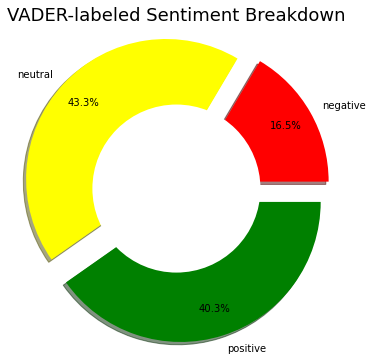

In [8]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors = ['red','yellow', 'green']
plt.pie(by_vader, labels=by_vader.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('VADER-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
plt.show()

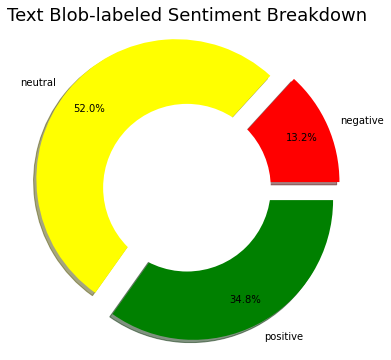

In [9]:
fig2, ax2 = plt.subplots(figsize=(6,6))

my_explode = (0.1, 0.1, 0.1)
my_colors =  ['red','yellow', 'green']
plt.pie(by_textblob, labels=by_textblob.index, autopct='%1.1f%%', shadow=True, 
        pctdistance=0.80, explode=my_explode, colors=my_colors)
plt.title('Text Blob-labeled Sentiment Breakdown', size='18')

#draw circle and convert pie chart to Donut Chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  


plt.show()

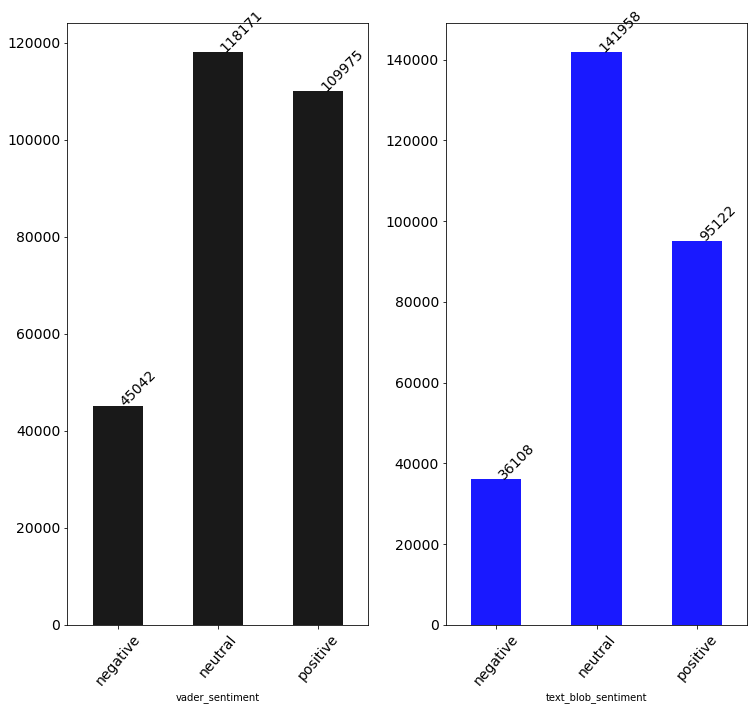

In [11]:
plt.subplot(1, 3, 2)
v_labels = by_vader.values
by_vader.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='black')
for i in range(3):
    plt.text(x=i, y=v_labels[i], s=v_labels[i], size=14, rotation=45, color='black')

plt.subplot(1, 3, 3)
tb_labels = by_textblob.values
by_textblob.plot.bar(fontsize=14, rot=50, alpha=0.9, figsize=(15,10), color='blue')
for i in range(3):
    plt.text(x=i, y=tb_labels[i], s=tb_labels[i], size=14, rotation=45, color='black')

plt.yticks(size=14)
plt.tight_layout()
plt.show()